In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno

pd.set_option('display.max_columns', None)


### Data Load + Exploratory Analysis

https://www.seanlahman.com/baseball-archive/statistics

In [2]:
people = pd.read_csv('LahmanData2023\core\People.csv')
salary = pd.read_csv('LahmanData2023\contrib\Salaries.csv')
batting = pd.read_csv('LahmanData2023\core\Batting.csv')
pitching = pd.read_csv('LahmanData2023\core\Pitching.csv')
teams = pd.read_csv('LahmanData2023\core\Teams.csv')

#get unique dictionary of team to franchise IDs to merge into following dataframes
franch_IDs = []
for team in teams['teamID'].unique():
    franch_IDs.append(teams[teams['teamID'] == team]['franchID'].iloc(0)[0])

franchises = pd.DataFrame(list(zip(teams['teamID'].unique(),franch_IDs)), columns=['teamID','franchID'])

In [3]:
player_seasons = people.merge(salary,on='playerID').drop(
    columns=['deathYear','deathMonth', 'deathDay','deathCountry', 'deathState', 'deathCity'])

player_seasons = player_seasons.merge(batting.drop(columns = ['teamID','lgID']), on=["playerID",'yearID']).merge(franchises, on='teamID')

In [4]:
pitching[pitching['playerID'] == 'brainas01']

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
20,brainas01,1872,1,WS3,NaN,2,7,9,9,9,...,NaN,12,NaN,0,449.0,0,140,NaN,NaN,NaN
21,brainas01,1872,2,MID,NaN,0,2,2,2,1,...,NaN,0,NaN,0,50.0,0,17,NaN,NaN,NaN
44,brainas01,1873,1,BL1,NaN,5,7,14,14,12,...,NaN,3,NaN,0,568.0,0,139,NaN,NaN,NaN
70,brainas01,1874,1,BL1,NaN,5,22,30,27,25,...,NaN,19,NaN,0,1267.0,4,329,NaN,NaN,NaN


In [5]:
batting[batting['playerID'] == 'brainas01']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
22,brainas01,1871,1,WS3,NaN,30,134,24,30,4,...,21.0,4.0,0.0,7,2.0,NaN,NaN,NaN,NaN,1.0
139,brainas01,1872,1,WS3,NaN,9,43,8,16,3,...,6.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
140,brainas01,1872,2,MID,NaN,6,25,2,5,0,...,1.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,0.0
292,brainas01,1873,1,BL1,NaN,16,69,18,18,1,...,9.0,0.0,0.0,0,2.0,NaN,NaN,NaN,NaN,0.0
412,brainas01,1874,1,BL1,NaN,47,196,19,47,3,...,8.0,0.0,3.0,2,3.0,NaN,NaN,NaN,NaN,3.0


In [7]:
player_seasons[player_seasons['playerID'] == 'gennesc01']

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID
11918,gennesc01,1990.0,5.0,1.0,USA,OH,Cincinnati,Scooter,Gennett,Ryan Joseph,185.0,70.0,L,R,2013-06-03,2019-08-26,genns001,gennesc01,2014,MIL,NL,504000,1,137,440,55,127,31,3,9,54.0,6.0,3.0,22,67.0,5.0,0.0,8.0,4.0,11.0,MIL
11919,gennesc01,1990.0,5.0,1.0,USA,OH,Cincinnati,Scooter,Gennett,Ryan Joseph,185.0,70.0,L,R,2013-06-03,2019-08-26,genns001,gennesc01,2015,MIL,NL,516500,1,114,375,42,99,18,4,6,29.0,1.0,3.0,12,68.0,5.0,4.0,0.0,0.0,11.0,MIL
11920,gennesc01,1990.0,5.0,1.0,USA,OH,Cincinnati,Scooter,Gennett,Ryan Joseph,185.0,70.0,L,R,2013-06-03,2019-08-26,genns001,gennesc01,2016,MIL,NL,518100,1,136,498,58,131,30,1,14,56.0,8.0,1.0,38,114.0,1.0,2.0,1.0,2.0,11.0,MIL


In [6]:
team_seasons = player_seasons.groupby(by=['franchID','yearID']).agg({'salary':'sum'}).reset_index()

In [7]:
team_seasons = team_seasons.merge(teams[teams.columns[0:14]], on=['franchID','yearID'])

In [8]:
batting_nosalary = batting[batting['playerID'].isin(people[~people['playerID'].isin(player_seasons['playerID'].unique())]['playerID'].unique())].merge(franchises, on='teamID')

In [9]:
batting_nosalary.keys()

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'franchID'],
      dtype='object')

In [10]:
batting_nosalary = batting_nosalary[batting_nosalary['yearID'] >= min(player_seasons['yearID'])]
batting_nosalary = batting_nosalary[batting_nosalary['yearID'] <= max(player_seasons['yearID'])]
print(batting_nosalary.head(6))
print(batting_nosalary.tail(20))

       playerID  yearID  stint teamID lgID   G  AB  R  H  2B  ...   SB   CS  \
4036  abregjo01    1985      1    CHN   NL   6   9  0  0   0  ...  0.0  0.0   
4037  botelde01    1985      1    CHN   NL  11  14  2  2   0  ...  0.0  0.0   
4038  engelst01    1985      1    CHN   NL  11  16  1  3   0  ...  0.0  0.0   
4039   gurala01    1985      2    CHN   NL   5   6  0  0   0  ...  0.0  0.0   
4040  meridro01    1985      1    CHN   NL  32   4  0  1   0  ...  0.0  0.0   
4041   owenda01    1985      1    CHN   NL  22  19  6  7   0  ...  1.0  1.0   

      BB   SO  IBB  HBP   SH   SF  GIDP  franchID  
4036   0  2.0  0.0  0.0  0.0  0.0   0.0       CHC  
4037   1  5.0  0.0  0.0  0.0  0.0   0.0       CHC  
4038   3  7.0  0.0  0.0  0.0  0.0   0.0       CHC  
4039   1  4.0  0.0  0.0  0.0  0.0   0.0       CHC  
4040   1  1.0  0.0  0.0  0.0  0.0   0.0       CHC  
4041   1  5.0  0.0  0.0  0.0  0.0   0.0       CHC  

[6 rows x 23 columns]
        playerID  yearID  stint teamID lgID   G  AB  R   H 

In [11]:
player_seasons[player_seasons['playerID']=='telisto01']

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,nameGiven,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,franchID


In [12]:
salary[salary['playerID'] == 'telisto01']

,yearID,teamID,lgID,playerID,salary


In [13]:
player_seasons.keys()

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'nameFirst', 'nameLast', 'nameGiven',
       'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID',
       'bbrefID', 'yearID', 'teamID', 'lgID', 'salary', 'stint', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'franchID'],
      dtype='object')

In [14]:
games_by_year_nosalary = batting_nosalary.groupby(by='yearID').sum()['G']
games_by_year_salary = player_seasons.groupby(by='yearID').sum()['G']

games_by_team_nosalary = batting_nosalary.groupby(by='franchID').sum()['G']
games_by_team_salary = player_seasons.groupby(by='franchID').sum()['G']

In [15]:
games_by_year_nosalary.values

array([3510, 1422, 1430, 1164,  676,  676, 1144,  788, 1063,  346,  448,
        553,  499,  461,  626, 1143, 1089, 1306, 1869, 1565, 1452, 1555,
       1424, 2082, 1801, 1583, 2166, 2068, 2066, 2387, 4234, 8792],
      dtype=int64)

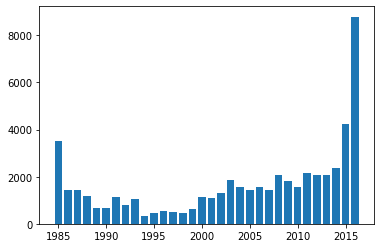

In [16]:
plt.bar(games_by_year_nosalary.keys(),games_by_year_nosalary.values);

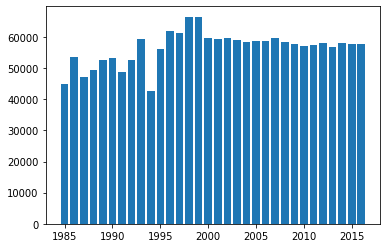

In [17]:
plt.bar(games_by_year_salary.keys(),games_by_year_salary.values);

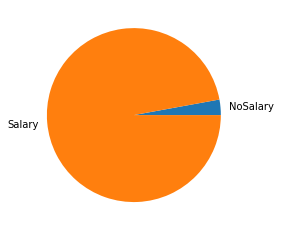

In [18]:
plt.pie([sum(games_by_year_nosalary),sum(games_by_year_salary)], labels=['NoSalary','Salary']);

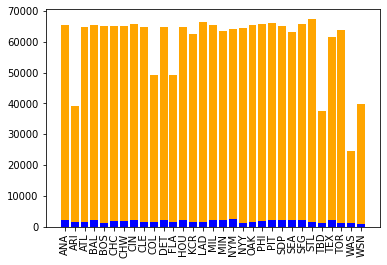

In [19]:
y_offset = np.zeros(len(games_by_team_nosalary.keys()))
colors= ['blue','orange']

for i,a in enumerate([games_by_team_nosalary,games_by_team_salary]):

    plt.bar(games_by_team_nosalary.keys(),a.values, bottom=y_offset, color = colors[i])
    y_offset = y_offset + a.values

plt.xticks(rotation=90);

In [20]:
games_by_year_team_salary = player_seasons.groupby(by=['yearID','franchID']).agg({'G':'sum'}).reset_index()

In [21]:
games_by_year_team_salary

,yearID,franchID,G
0,1985,ANA,2012
1,1985,ATL,1897
2,1985,BAL,1835
3,1985,BOS,1903
4,1985,CHC,1808
...,...,...,...
913,2016,STL,2176
914,2016,TBD,1873
915,2016,TEX,1730
916,2016,TOR,2094


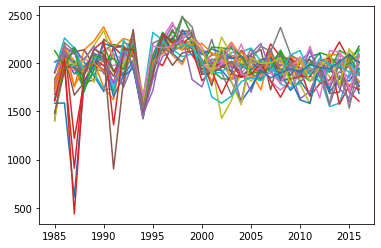

In [22]:
for key in games_by_year_team_salary['franchID'].unique():
    x = games_by_year_team_salary[games_by_year_team_salary['franchID'] == key]['yearID']
    y = games_by_year_team_salary[games_by_year_team_salary['franchID'] == key]['G']

    plt.plot(x,y)



In [23]:
player_seasons_full = people.merge(salary,how='outer',on='playerID').drop(
    columns=['deathYear','deathMonth', 'deathDay','deathCountry', 'deathState', 'deathCity'])

In [24]:
people.keys()

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [25]:
salary.keys()

Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')

In [26]:
player_seasons_full[player_seasons_full['playerID'] == "clemepa02"]

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,nameFirst,nameLast,nameGiven,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
7019,clemepa02,1988.0,2.0,14.0,USA,SC,Columbia,Paul,Clemens,Paul Arthur,...,R,R,2013-04-09,2016-10-02,clemp002,clemepa02,NaN,NaN,NaN,NaN


<AxesSubplot:>

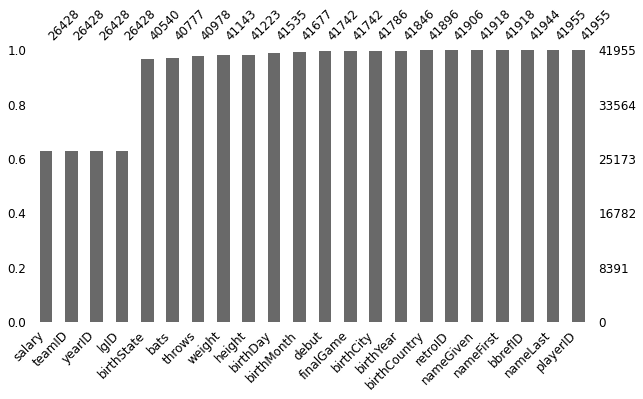

In [27]:
missingno.bar(player_seasons_full,sort="ascending", figsize=(10,5), fontsize=12)

<AxesSubplot:>

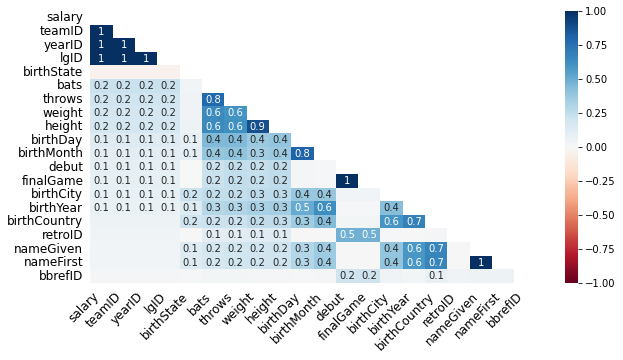

In [28]:
missingno.heatmap(player_seasons_full,sort="ascending", figsize=(10,5), fontsize=12)

In [29]:
player_seasons_full_batting = player_seasons_full.merge(batting.drop(columns = ['teamID','lgID']),how='outer', on=["playerID",'yearID']).merge(franchises, on='teamID')

<AxesSubplot:>

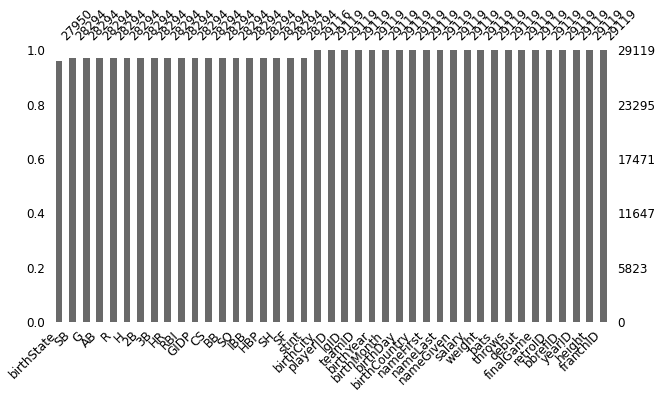

In [30]:
missingno.bar(player_seasons_full_batting,sort="ascending", figsize=(10,5), fontsize=12)

<AxesSubplot:>

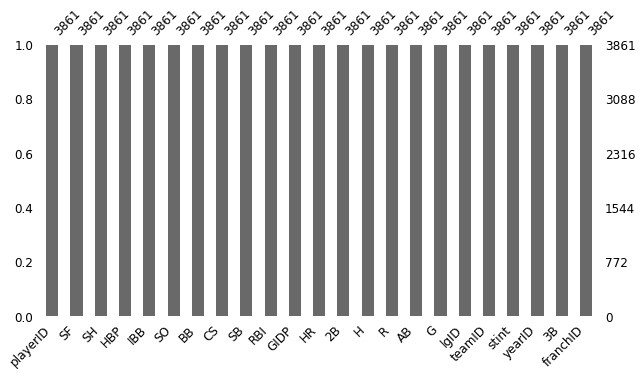

In [31]:
missingno.bar(batting_nosalary,sort="ascending", figsize=(10,5), fontsize=12)

(array([2.76e+03, 6.56e+02, 2.32e+02, 1.14e+02, 4.90e+01, 2.50e+01,
        1.50e+01, 8.00e+00, 1.00e+00, 1.00e+00]),
 array([  1. ,  15.4,  29.8,  44.2,  58.6,  73. ,  87.4, 101.8, 116.2,
        130.6, 145. ]),
 <BarContainer object of 10 artists>)

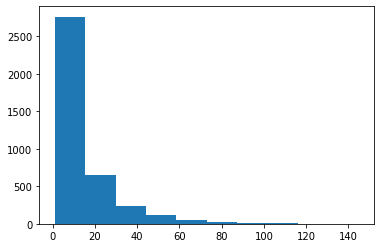

In [32]:
plt.hist(batting_nosalary['G'])

(array([280., 104.,  88.,  81.,  70.,  80.,  58.,  72.,  40.,  66.,  64.,
         50.,  65.,  74., 114.,  91., 113., 126., 116., 109., 124., 137.,
        153., 139., 134., 152., 136., 154., 182., 689.]),
 array([1985.        , 1986.03333333, 1987.06666667, 1988.1       ,
        1989.13333333, 1990.16666667, 1991.2       , 1992.23333333,
        1993.26666667, 1994.3       , 1995.33333333, 1996.36666667,
        1997.4       , 1998.43333333, 1999.46666667, 2000.5       ,
        2001.53333333, 2002.56666667, 2003.6       , 2004.63333333,
        2005.66666667, 2006.7       , 2007.73333333, 2008.76666667,
        2009.8       , 2010.83333333, 2011.86666667, 2012.9       ,
        2013.93333333, 2014.96666667, 2016.        ]),
 <BarContainer object of 30 artists>)

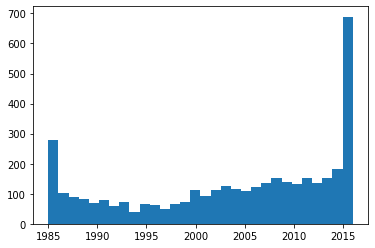

In [33]:
plt.hist(batting_nosalary['yearID'],bins=30)

In [34]:
for player in batting_nosalary[batting_nosalary['G'] > 100]['playerID']:
    print(player)
    print(player_seasons_full[player_seasons_full['playerID'] == player])

josepto01
        playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
19289  josepto01     1991.0         7.0      16.0          USA         AZ   

      birthCity nameFirst nameLast       nameGiven  ...  bats  throws  \
19289   Phoenix     Tommy   Joseph  Thomas Richard  ...     R       R   

            debut   finalGame   retroID    bbrefID yearID teamID  lgID salary  
19289  2016-05-13  2017-09-30  joset001  josepto01    NaN    NaN   NaN    NaN  

[1 rows x 22 columns]
robinde02
        playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
32115  robinde02     1987.0         9.0      28.0          USA         FL   

         birthCity nameFirst  nameLast      nameGiven  ...  bats  throws  \
32115  Gainesville   Derrick  Robinson  Derrick Lamar  ...     B       L   

            debut   finalGame   retroID    bbrefID yearID teamID  lgID salary  
32115  2013-04-05  2013-09-29  robid002  robinde02    NaN    NaN   NaN    NaN  

[1 rows x 22 columns]
diaz

In [35]:
batting[batting['playerID'] == 'diazal02']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
101683,diazal02,2016,1,SLN,NL,111,404,71,121,28,...,65.0,4.0,4.0,41,60.0,6.0,7.0,2.0,6.0,10.0
103165,diazal02,2017,1,SLN,NL,79,286,31,74,17,...,20.0,4.0,1.0,13,42.0,1.0,0.0,1.0,1.0,9.0
104669,diazal02,2018,1,TOR,AL,130,422,55,111,26,...,55.0,3.0,4.0,23,62.0,2.0,3.0,0.0,4.0,9.0
106219,diazal02,2019,1,HOU,AL,69,210,36,57,12,...,40.0,2.0,0.0,26,28.0,1.0,5.0,0.0,6.0,10.0
107739,diazal02,2020,1,HOU,AL,17,58,8,14,5,...,6.0,0.0,0.0,1,12.0,0.0,0.0,0.0,0.0,1.0
109165,diazal02,2021,1,HOU,AL,84,294,28,76,19,...,45.0,0.0,1.0,16,62.0,3.0,9.0,0.0,0.0,7.0
110890,diazal02,2022,1,HOU,AL,92,305,35,74,13,...,38.0,1.0,1.0,18,53.0,0.0,2.0,0.0,2.0,7.0


In [36]:
salary[salary['playerID'] == 'diazal02']

,yearID,teamID,lgID,playerID,salary


player_seasons_full = people.merge(salary,how='outer',on='playerID').drop(
    columns=['deathYear','deathMonth', 'deathDay','deathCountry', 'deathState', 'deathCity'])

player_seasons_full = player_seasons_full.merge(batting.drop(columns = ['teamID','lgID']),how='outer', on=["playerID",'yearID']).merge(franchises, on='teamID')

In [37]:
player_seasons[player_seasons['yearID'] == 2016]['salary'].describe()

count    9.010000e+02
mean     4.492526e+06
std      5.822950e+06
min      5.075000e+05
25%      5.213000e+05
50%      1.700000e+06
75%      6.170000e+06
max      3.300000e+07
Name: salary, dtype: float64

(array([325.,  50.,  32.,  30.,  34.,  22.,  41.,  21.,  14.,  18.,  16.,
         19.,   7.,  10.,  18.,  12.,   7.,  15.,   9.,  10.,  11.,   9.,
          3.,  11.,  10.,   4.,   9.,   5.,   6.,  14.,   1.,   3.,  10.,
          2.,   2.,  12.,   1.,   7.,  11.,   0.,   4.,   0.,   9.,   2.,
          0.,   8.,   0.,   1.,   7.,   2.,   1.,   3.,   0.,   1.,   4.,
          0.,   1.,   0.,   0.,   1.,   8.,   0.,   0.,   2.,   2.,   1.,
          1.,   5.,   0.,   1.,   3.,   2.,   0.,   3.,   0.,   1.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  507000.,   827640.,  1148280.,  1468920.,  1789560.,  2110200.,
         2430840.,  2751480.,  3072120.,  3392760.,  3713400.,  4034040.,
         4354680.,  4675320.,  4995960.,  5316600.,  5637240.,  5957880.,
         6278520.,  6599160.,  6919800.,  7240440.,  7561080.,  7881720.,
         8202360.,  85

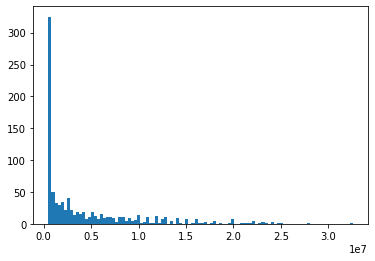

In [38]:
plt.hist(player_seasons[player_seasons['yearID'] == 2015]['salary'], bins=100)

In [39]:
bref_bat = pd.read_csv('war_daily_bat.txt')
bref_pitch = pd.read_csv('war_daily_pitch.txt')

In [45]:
player_seasons_bref = player_seasons.merge(bref_bat, how='outer', left_on=["playerID",'yearID'],right_on=['player_ID','year_ID'])

In [48]:
len(player_seasons)

28294

In [49]:
len(player_seasons_bref)

126002

In [52]:
player_seasons_bref.keys()

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'nameFirst', 'nameLast', 'nameGiven',
       'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID',
       'bbrefID', 'yearID', 'teamID', 'lgID', 'salary_x', 'stint', 'G_x', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP', 'franchID', 'name_common', 'age', 'mlb_ID',
       'player_ID', 'year_ID', 'team_ID', 'stint_ID', 'lg_ID', 'PA', 'G_y',
       'Inn', 'runs_bat', 'runs_br', 'runs_dp', 'runs_field', 'runs_infield',
       'runs_outfield', 'runs_catcher', 'runs_good_plays', 'runs_defense',
       'runs_position', 'runs_position_p', 'runs_replacement',
       'runs_above_rep', 'runs_above_avg', 'runs_above_avg_off',
       'runs_above_avg_def', 'WAA', 'WAA_off', 'WAA_def', 'WAR', 'WAR_def',
       'WAR_off', 'WAR_rep', 'salary_y', 'pitcher', 'teamRpG', 'oppRpG',
       'oppRpPA_rep', 'oppRpG_rep', 'py

In [58]:
missingno.bar(player_seasons_bref.columns['playerID','player_ID'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<AxesSubplot:>

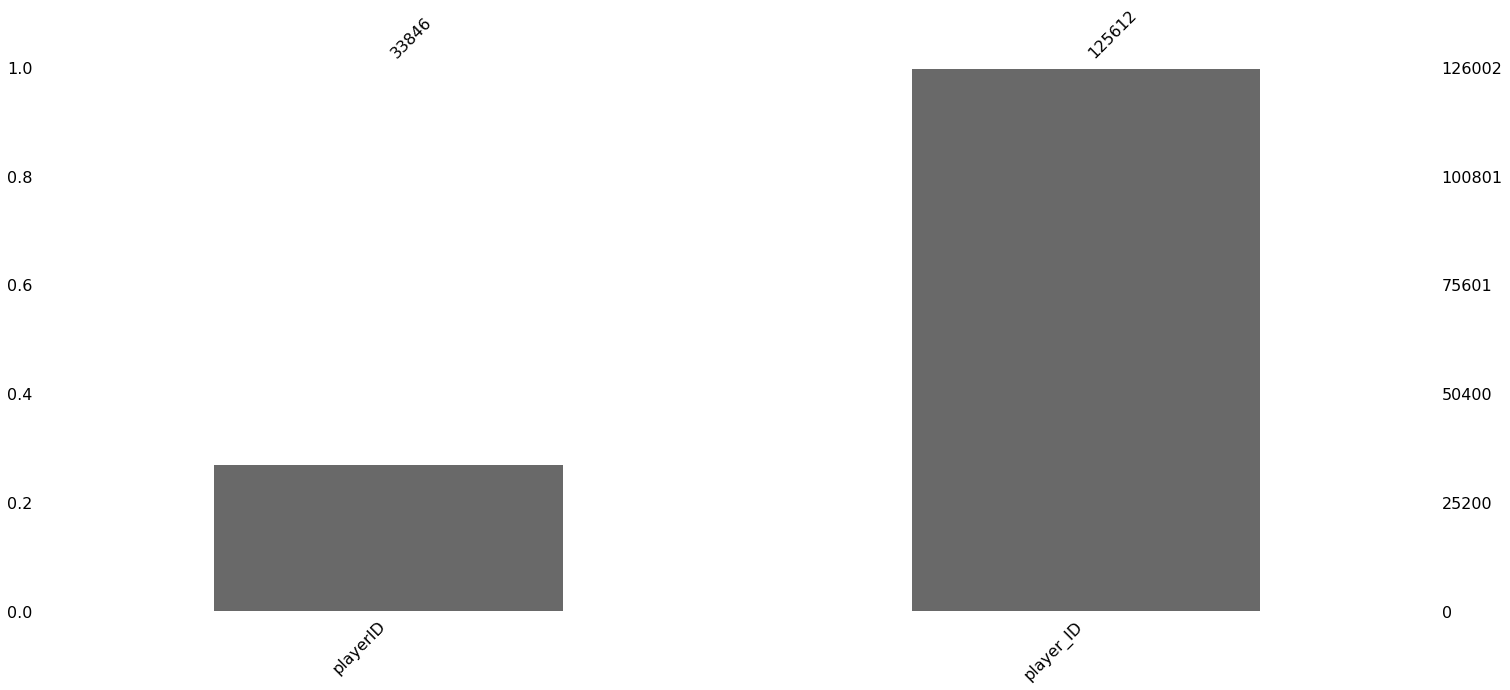

In [68]:
missingno.bar(player_seasons_bref.loc[:,['playerID','player_ID']])

### Visualization 

Summary of data:


player_seasons - dataframe of all player seasons with batting, pitching, and salary data


team_seasons - dataframe of all team seasons with team salary and results